# World Happiness Report Analysis and Prediction

Analysed the world happiness dataset and created a prediction model using Linear Regression using the World Happiness Report of the year 2021. <br> 
Dataset Source: The World Happiness Report 2021

The World Happiness Report is a publication from the United Nations that contains articles and rankings of national happiness, based on respondent ratings of their own lives, which the report also correlates with various life factors.

In [1]:
defaultW <- getOption("warn") 

options(warn = -1) 
#importing libraries
library(plyr)
library(dplyr)
library(tidyverse)
library(caTools)
library(ggplot2)
library(ggthemes)
library(reshape2)
library(data.table)
library(tidyr)
library(corrgram)       
library(corrplot)
options(warn = defaultW)


Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.1     v stringr 1.4.0
v tidyr   1.1.3     v forcats 0.5.1
v readr   1.4.0     

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::arrange()   masks plyr::arrange()
x purrr::compact()   masks plyr::compact()
x dplyr::count()     masks plyr::count()
x dplyr::failwith()  masks plyr::failwith()
x dplyr::filter()    masks stats::filter()
x dplyr::id()        masks plyr::id()
x dplyr::lag()       masks stats::la

In [2]:
#Loading dataset
happ <- read.csv("world-happiness-report-2021.csv")
str(happ)

'data.frame':	149 obs. of  20 variables:
 $ ï..Country.name                           : chr  "Finland" "Denmark" "Switzerland" "Iceland" ...
 $ Regional.indicator                        : chr  "Western Europe" "Western Europe" "Western Europe" "Western Europe" ...
 $ Ladder.score                              : num  7.84 7.62 7.57 7.55 7.46 ...
 $ Standard.error.of.ladder.score            : num  0.032 0.035 0.036 0.059 0.027 0.035 0.036 0.037 0.04 0.036 ...
 $ upperwhisker                              : num  7.9 7.69 7.64 7.67 7.52 ...
 $ lowerwhisker                              : num  7.78 7.55 7.5 7.44 7.41 ...
 $ Logged.GDP.per.capita                     : num  10.8 10.9 11.1 10.9 10.9 ...
 $ Social.support                            : num  0.954 0.954 0.942 0.983 0.942 0.954 0.934 0.908 0.948 0.934 ...
 $ Healthy.life.expectancy                   : num  72 72.7 74.4 73 72.4 73.3 72.7 72.6 73.4 73.3 ...
 $ Freedom.to.make.life.choices              : num  0.949 0.946 0.919 0.955 0.91

In [3]:
dim(happ)

[1] 149  20

In [4]:
happ <- happ[, -c(2,4,5,6,13,14,15,16,17,18,19)] #dropping unnecessary columns

In [5]:
head(happ)

,ï..Country.name,Ladder.score,Logged.GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Dystopia...residual
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868
3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839
4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967
5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798
6,Norway,7.392,11.053,0.954,73.3,0.960,0.093,0.270,2.580


In [6]:
#Renaming columns for convenience
happ <- happ %>% rename(c("Country" = "ï..Country.name" ,
                      "Score" = "Ladder.score",
                      "GDP" = "Logged.GDP.per.capita", 
                      "Family" = "Social.support",
                      "Health" = "Healthy.life.expectancy", 
                      "Freedom" = "Freedom.to.make.life.choices",
                      "Corruption" = "Perceptions.of.corruption",
                         "Dystopia.residual" = "Dystopia...residual"))


In [7]:
head(happ)

,Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Dystopia.residual
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253
2,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868
3,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839
4,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967
5,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798
6,Norway,7.392,11.053,0.954,73.3,0.960,0.093,0.270,2.580


In [8]:
#Adding country ranks in the dataset according to their scores
happ <- happ %>% mutate(Rank = row_number())
happ

Country,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Dystopia.residual,Rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Finland,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,1
Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2.868,2
Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2.839,3
Iceland,7.554,10.878,0.983,73.000,0.955,0.160,0.673,2.967,4
Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338,2.798,5
Norway,7.392,11.053,0.954,73.300,0.960,0.093,0.270,2.580,6
Sweden,7.363,10.867,0.934,72.700,0.945,0.086,0.237,2.683,7
Luxembourg,7.324,11.647,0.908,72.600,0.907,-0.034,0.386,2.653,8
New Zealand,7.277,10.643,0.948,73.400,0.929,0.134,0.242,2.612,9


<b> Correlation matrix </b> <br>
To find out which factors correlate the most with the happiness quotient

In [9]:
library(corrgram) 
library(corrplot)

library(rpart) 
str(happ)

library(ggplot2) 
library(ggthemes) 
num.cols <- sapply(happ,is.numeric) 
cor.data <- cor(happ[,num.cols]) 
print(cor.data)

#correlation matrix
cor <- cor(happ)

str(happ)
colnames(happ)
head(happ) 
summary(happ)
print(corrplot(cor.data, method = 'color')) 

'data.frame':	149 obs. of  10 variables:
 $ Country          : chr  "Finland" "Denmark" "Switzerland" "Iceland" ...
 $ Score            : num  7.84 7.62 7.57 7.55 7.46 ...
 $ GDP              : num  10.8 10.9 11.1 10.9 10.9 ...
 $ Family           : num  0.954 0.954 0.942 0.983 0.942 0.954 0.934 0.908 0.948 0.934 ...
 $ Health           : num  72 72.7 74.4 73 72.4 73.3 72.7 72.6 73.4 73.3 ...
 $ Freedom          : num  0.949 0.946 0.919 0.955 0.913 0.96 0.945 0.907 0.929 0.908 ...
 $ Generosity       : num  -0.098 0.03 0.025 0.16 0.175 0.093 0.086 -0.034 0.134 0.042 ...
 $ Corruption       : num  0.186 0.179 0.292 0.673 0.338 0.27 0.237 0.386 0.242 0.481 ...
 $ Dystopia.residual: num  3.25 2.87 2.84 2.97 2.8 ...
 $ Rank             : int  1 2 3 4 5 6 7 8 9 10 ...
                        Score         GDP      Family     Health    Freedom
Score              1.00000000  0.78975970  0.75688765  0.7680995  0.6077531
GDP                0.78975970  1.00000000  0.78529868  0.8594606  0.432323

ERROR: Error in cor(happ): 'x' must be numeric


In [ ]:
library(corrgram) 
library(corrplot)

print(corrplot(cor.data, method = 'color')) 
ggsave("corr.png")

Hence, happiness most strongly correlates with the attributes of GDP, Health, Social Support(Family) and Freedom.

In [10]:
# Creating a new column for continents

happ$Continent <- NA

happ$Continent[which(happ$Country %in% c("Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
                                   "Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
                                   "South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
                                   "Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
                                   "Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
                                   "Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
                                   "Cambodia", "Afghanistan", "Yemen", "Syria"))] <- "Asia"
happ$Continent[which(happ$Country %in% c("Norway", "Denmark", "Iceland", "Switzerland", "Finland",
                                   "Netherlands", "Sweden", "Austria", "Ireland", "Germany",
                                   "Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
                                   "Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
                                   "Russia", "Lithuania", "Latvia", "Moldova", "Romania",
                                   "Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
                                   "Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
                                   "Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
                                   "Bulgaria", "Albania", "Ukraine"))] <- "Europe"
happ$Continent[which(happ$Country %in% c("Canada", "Costa Rica", "United States", "Mexico",  
                                   "Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
                                   "Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
                                   "Haiti"))] <- "North America"
happ$Continent[which(happ$Country %in% c("Chile", "Brazil", "Argentina", "Uruguay",
                                   "Colombia", "Ecuador", "Bolivia", "Peru",
                                   "Paraguay", "Venezuela"))] <- "South America"
#happ$Continent[which(happ$Country %in% c("New Zealand", "Australia"))] <- "Australia"
happ$Continent[which(is.na(happ$Continent))] <- "Africa"


# Moving the continent column's position in the dataset to the second column

happ <- happ %>% select(Country,Continent, everything())

# Changing Continent column to factor

happ$Continent <- as.factor(happ$Continent)

str(happ)

'data.frame':	149 obs. of  11 variables:
 $ Country          : chr  "Finland" "Denmark" "Switzerland" "Iceland" ...
 $ Continent        : Factor w/ 5 levels "Africa","Asia",..: 3 3 3 3 3 3 3 3 1 3 ...
 $ Score            : num  7.84 7.62 7.57 7.55 7.46 ...
 $ GDP              : num  10.8 10.9 11.1 10.9 10.9 ...
 $ Family           : num  0.954 0.954 0.942 0.983 0.942 0.954 0.934 0.908 0.948 0.934 ...
 $ Health           : num  72 72.7 74.4 73 72.4 73.3 72.7 72.6 73.4 73.3 ...
 $ Freedom          : num  0.949 0.946 0.919 0.955 0.913 0.96 0.945 0.907 0.929 0.908 ...
 $ Generosity       : num  -0.098 0.03 0.025 0.16 0.175 0.093 0.086 -0.034 0.134 0.042 ...
 $ Corruption       : num  0.186 0.179 0.292 0.673 0.338 0.27 0.237 0.386 0.242 0.481 ...
 $ Dystopia.residual: num  3.25 2.87 2.84 2.97 2.8 ...
 $ Rank             : int  1 2 3 4 5 6 7 8 9 10 ...


In [11]:
head(happ)

,Country,Continent,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Dystopia.residual,Rank
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Finland,Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253,1
2,Denmark,Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868,2
3,Switzerland,Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839,3
4,Iceland,Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967,4
5,Netherlands,Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798,5
6,Norway,Europe,7.392,11.053,0.954,73.3,0.960,0.093,0.270,2.580,6


<b> Finding the average value of attributes per continent </b>

Warning message:
"`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."
Warning message in melt(happ.Continent):
"The melt generic in data.table has been passed a tbl_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(happ.Continent). In the next version, this warning will become an error."
Using Continent as id variables

Saving 6.67 x 6.67 in image



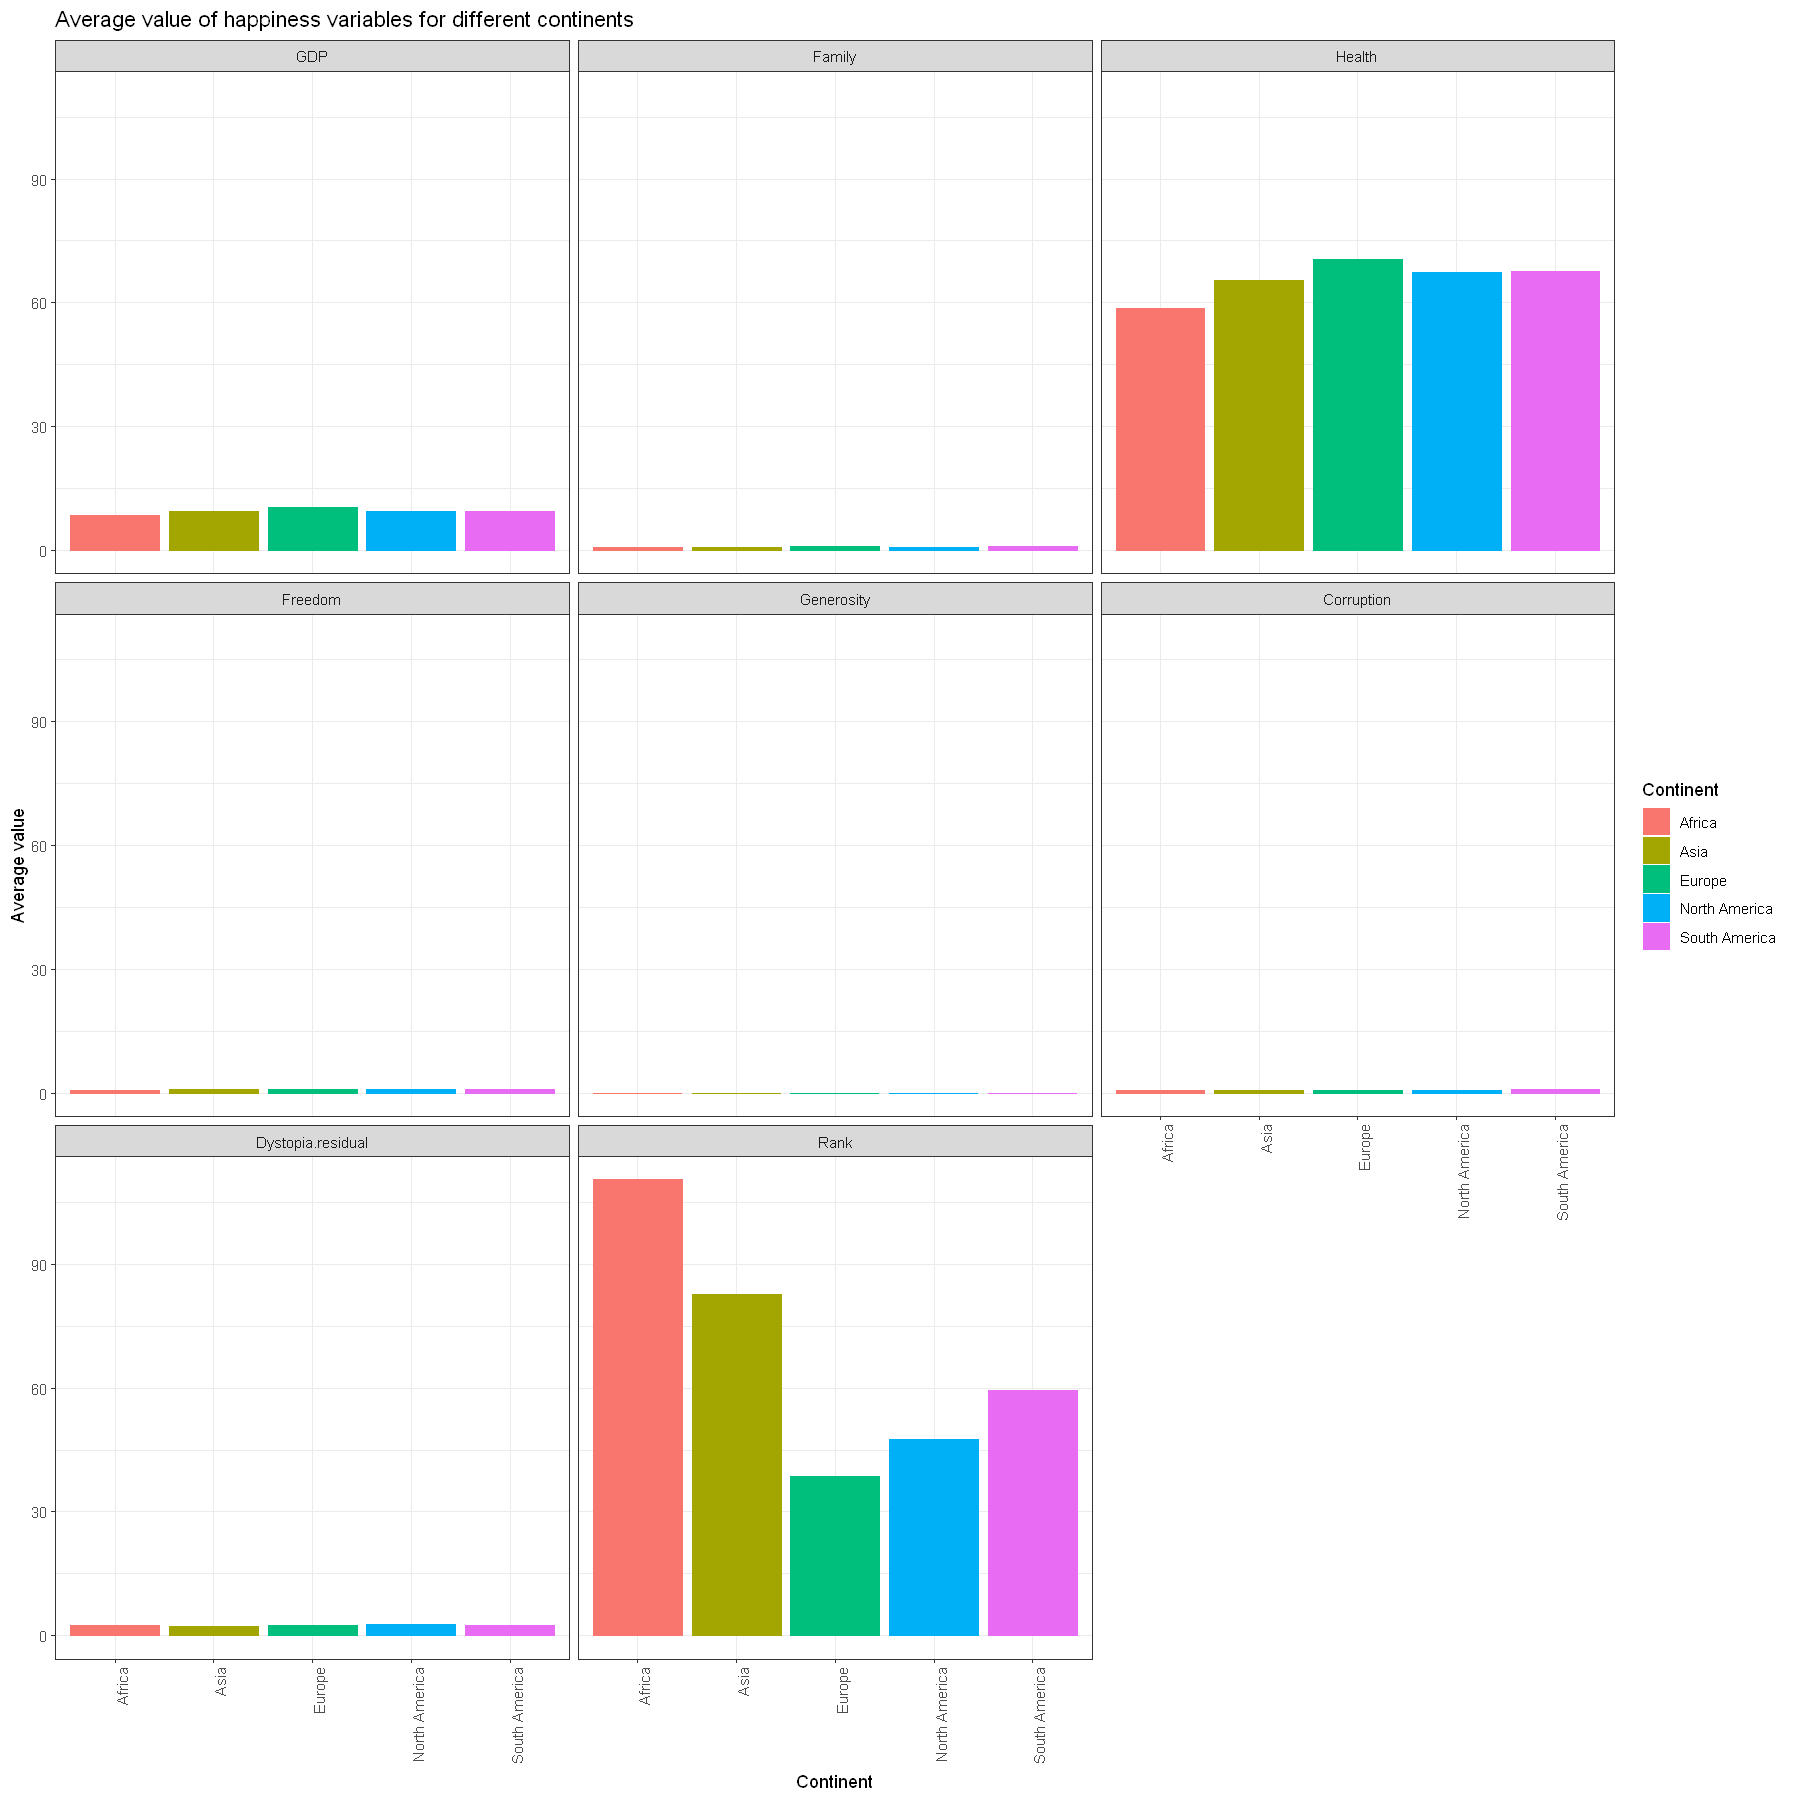

In [12]:
options(repr.plot.width=15, repr.plot.height=15)
happ.Continent <- happ %>%
                          select(-3) %>%
                          group_by(Continent) %>%
                          summarise_at(vars(-Country), funs(mean(., na.rm=TRUE)))

happ.Continent.melt <- melt(happ.Continent)

# Faceting
ggplot(happ.Continent.melt, aes(y=value, x=Continent, color=Continent, fill=Continent)) + 
  geom_bar( stat="identity") +    
  facet_wrap(~variable) + theme_bw() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title = "Average value of happiness variables for different continents", 
       y = "Average value") 
ggsave("avgcont.png")

<b> Finding how attributes correlate to happiness in the continent of Asia. </b>

In [ ]:
#Checking happiness matrix for Asia
options(repr.plot.width=10, repr.plot.height=8)
corrgram(happ %>% select(-3) %>% filter(Continent == "Asia"), order=TRUE,
         upper.panel=panel.cor, main="Happiness Matrix for Asia")
ggsave("asiacorr.png")

<b> Happiness score distribution across different continents using a scatter plot </b>

In [ ]:
options(repr.plot.width=10, repr.plot.height=8)
gg1 <- ggplot(happ,
              aes(x=Continent,
                  y=Score,
                  color=Continent))+
  geom_point() + theme_bw() +
  theme(axis.title = element_text(family = "Helvetica", size = (8)))
gg1
ggsave("happcont.png")

<b> Prediction </b> <br>
Splitting dataset to training and testing datasets and using Linear Regression to predict the dependent variable for a country (Happiness Score)

In [18]:
library(caTools)
set.seed(123)
dataset <- happ[3:10] #relevant columns into training
split = sample.split(dataset$Score, SplitRatio = 0.7) #splitting
training_set = subset(dataset, split == TRUE) #training set
test_set = subset(dataset, split == FALSE) #test set

In [32]:
regressor_lm = lm(formula = Score ~ .,
               data = training_set)

summary(regressor_lm) 


Call:
lm(formula = Score ~ ., data = training_set)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0019526 -0.0005332 -0.0001061  0.0005323  0.0020082 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -4.563e+00  1.203e-03   -3792   <2e-16 ***
GDP                3.494e-01  1.557e-04    2244   <2e-16 ***
Family             2.252e+00  1.232e-03    1828   <2e-16 ***
Health             3.147e-02  2.359e-05    1334   <2e-16 ***
Freedom            1.219e+00  9.658e-04    1262   <2e-16 ***
Generosity         6.518e-01  5.931e-04    1099   <2e-16 ***
Corruption        -6.386e-01  5.500e-04   -1161   <2e-16 ***
Dystopia.residual  9.999e-01  1.530e-04    6535   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0008327 on 96 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.448e+07 on 7 and 96 DF,  p-value: < 2.2e-16


An adjusted R-squared of 1 is obtained. The Multiple Linear Regression predicts happiness scores with an accuracy of 100%.

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not fo

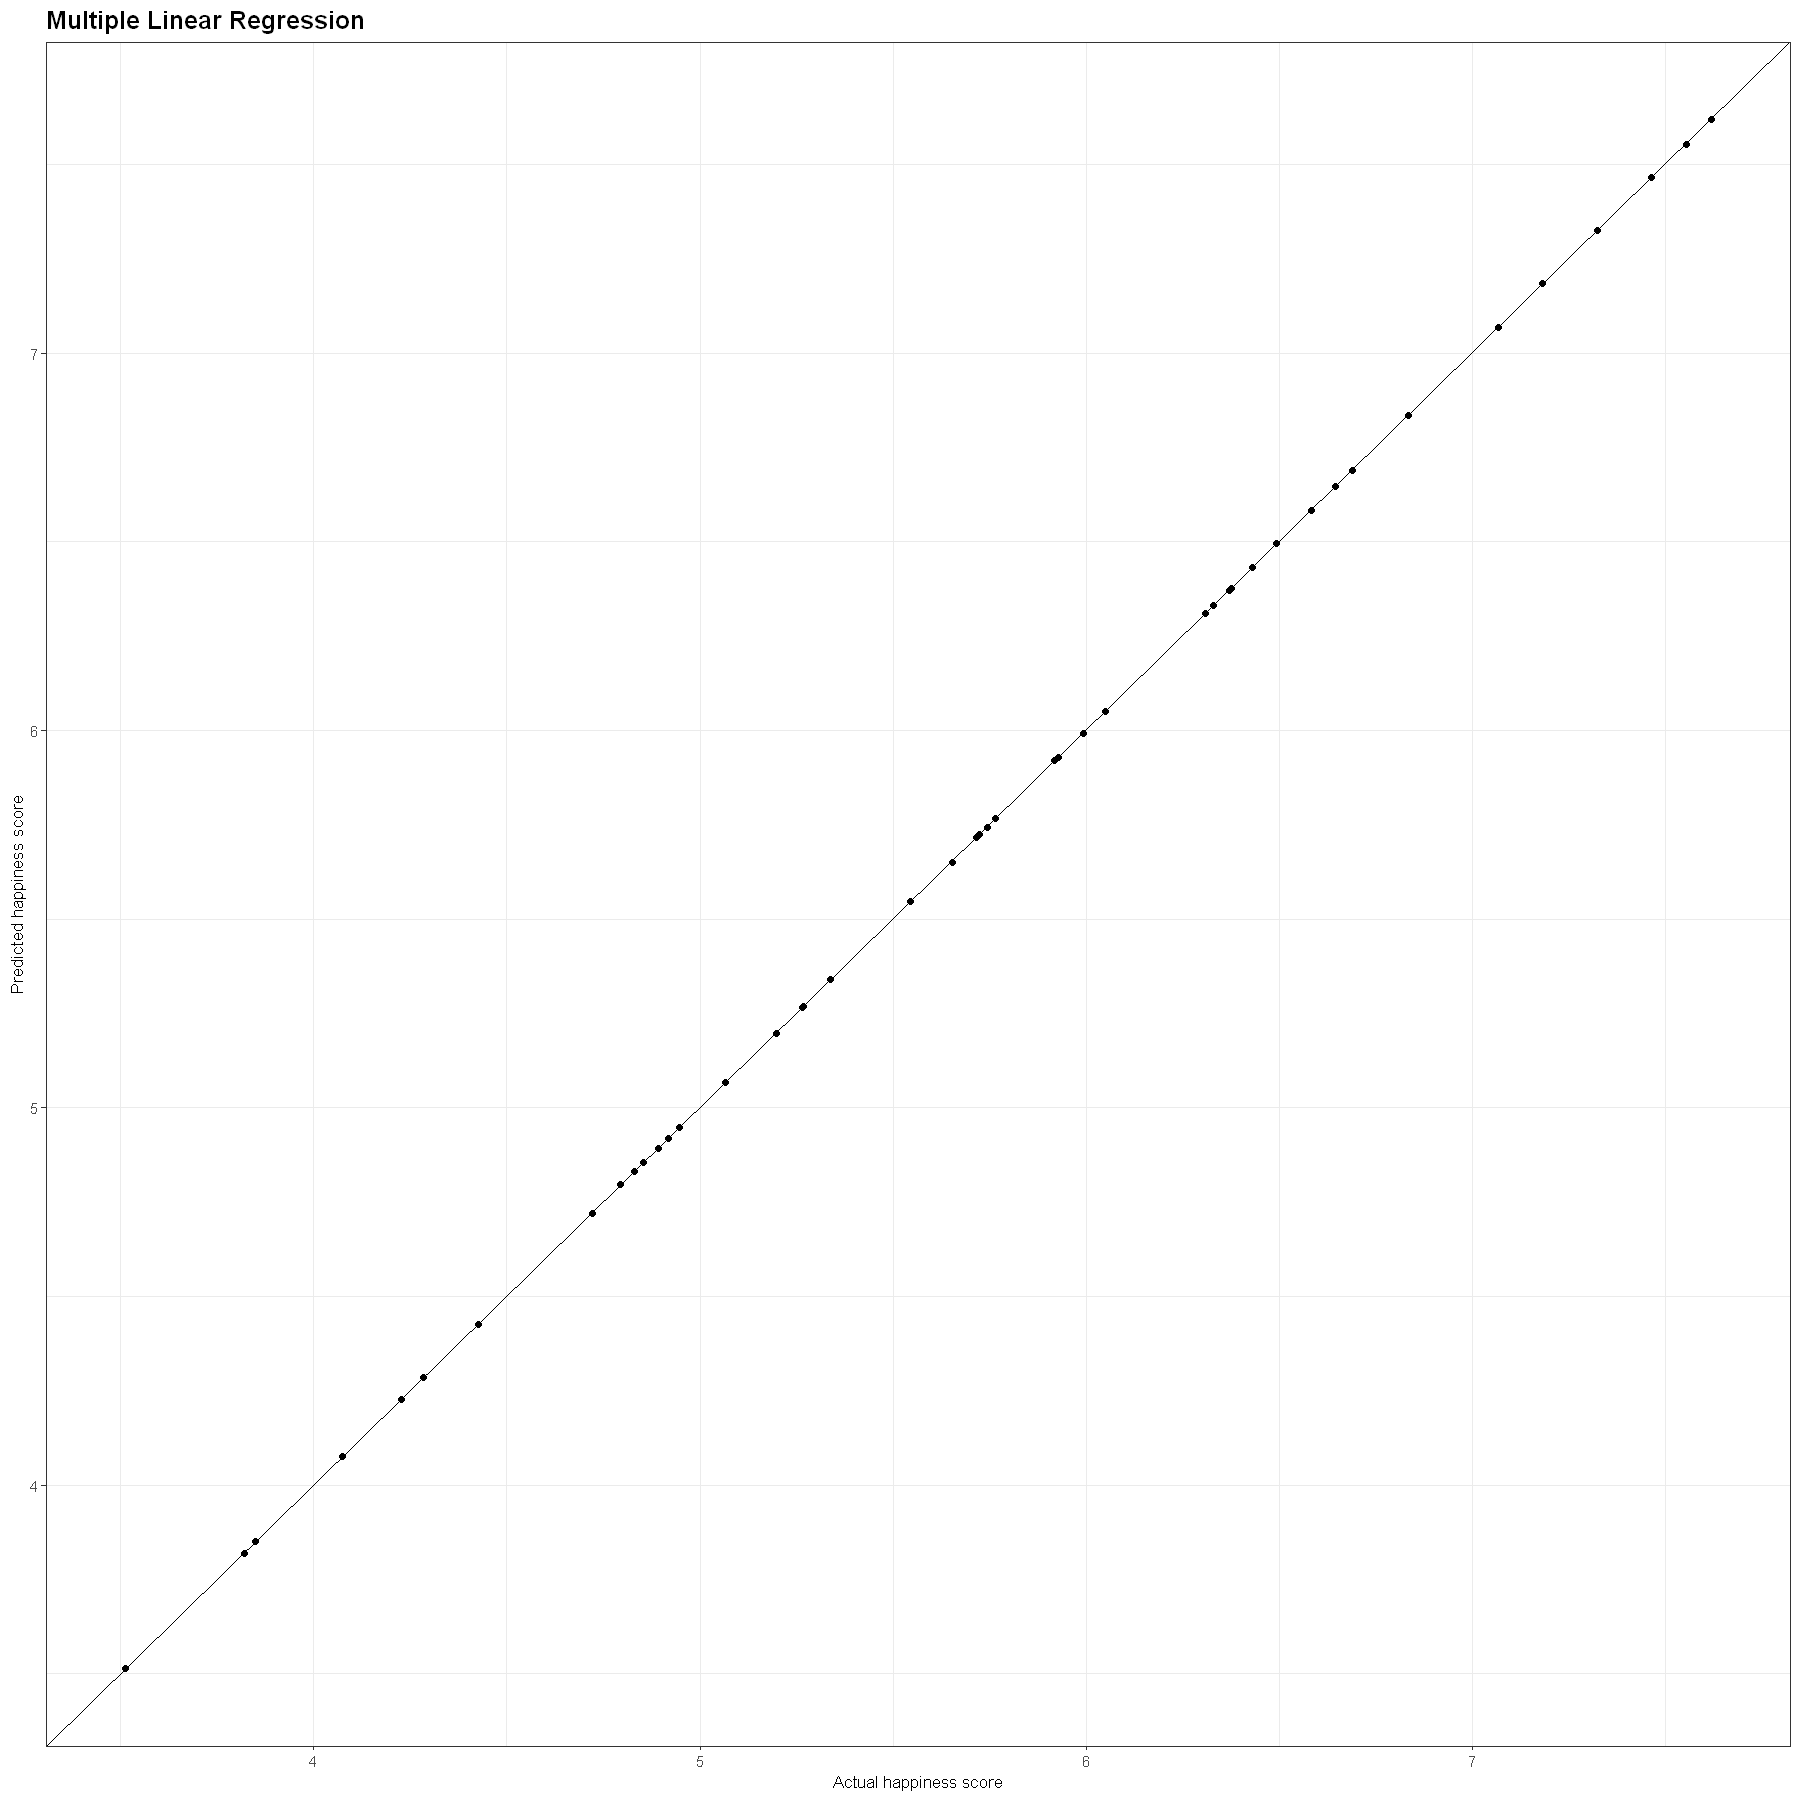

In [34]:
y_pred_lm = predict(regressor_lm, newdata = test_set)

Pred_Actual_lm <- as.data.frame(cbind(Prediction = y_pred_lm, Actual = test_set$Score))

gg.lm <- ggplot(Pred_Actual_lm, aes(Actual, Prediction )) +
  geom_point() + theme_bw() + geom_abline() +
  labs(title = "Multiple Linear Regression", x = "Actual happiness score",
       y = "Predicted happiness score") +
  theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)), 
        axis.title = element_text(family = "Helvetica", size = (10))) 

gg.lm
ggsave("model.png")

As expected, the above graph shows the accuracy of our model.

In [ ]:
MSE.lm <- sum((test_set$Happiness.Score - y_pred_lm)^2)/nrow(test_set)
print(paste("Mean Squared Error (Multiple Linear Regression):", MSE.lm))

<b> Providing a test input to the model to predict a happiness score </b>

In [ ]:
test1 <- data.frame(GDP = 10.555,
                  Family = 0.867,
                  Health = 71.02,
                  Freedom = 0.923,
                  Generosity = 0.021,
                  Corruption = 0.723,
                  Dystopia.residual = 2.463)
print(paste("Happiness Score: ", round(predict(regressor_lm, test1), 2)))

On providing the above test inputs, the model predicts this set's Happiness Score to be 6.45 which would put this sample country somewhere in the top 30 happiest countries in the current scenario. 

<b> Checking the trend of each attribute basis continent </b>

In [ ]:
options(repr.plot.width=12, repr.plot.height=12)

ggplot(data = happ, mapping=aes(x = Rank, y = GDP, color=Score)) +
    geom_line()+facet_wrap(facets =  vars(Continent))

In [ ]:
ggplot(data = happ, mapping=aes(x = Rank, y = Family, color=Score)) +
    geom_line()+facet_wrap(facets =  vars(Continent))

In [ ]:
ggplot(data = happ, mapping=aes(x = Rank, y = Health, color=Score)) +
    geom_line()+facet_wrap(facets =  vars(Continent)) + ggtitle("Health index over the continents")
ggsave("health.png")

In [ ]:
ggplot(data = happ, mapping=aes(x = Rank, y = Freedom, color=Score)) +
    geom_line()+facet_wrap(facets =  vars(Continent))

In [ ]:
ggplot(data = happ, mapping=aes(x = Rank, y = Generosity, color=Score)) +
    geom_line()+facet_wrap(facets =  vars(Continent))

In [ ]:
ggplot(data = happ, mapping=aes(x = Rank, y = Corruption, color=Score)) +
    geom_line()+facet_wrap(facets =  vars(Continent))

In [ ]:
ggplot(data = happ, mapping=aes(x = Rank, y = Dystopia.residual, color=Score)) +
    geom_line()+facet_wrap(facets =  vars(Continent))

<b> Checking the top 10 and bottom 10 countries on the World Happiness Report for 2021 </b>

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)

ggplot(happ[1:10,], aes(x = reorder(Country, Score), y=Score, fill = Country)) +  ggtitle("Top 10 happiest countries in 2021", subtitle = "9 of the happiest countries are in Europe") + geom_bar(stat="identity", width=0.7) + theme(plot.title = element_text(size=20)) + coord_flip()
ggsave("top10.png")

In [ ]:
ggplot(happ[140:149,], aes(x = reorder(Country, -Score), y=Score, fill = Country)) + ggtitle("Top 10 saddest countries in 2021") + geom_bar(stat="identity", width=0.7) + theme(plot.title = element_text(size=20)) + coord_flip()
ggsave("bottom10.png")

In [ ]:
happ_all <- read.csv("world-happiness-report.csv") #importing the dataset containing happiness scores from previous years country-wise

In [ ]:
dim(happ_all)

In [ ]:
happ_copy <- read.csv("world-happiness-report-2021.csv")

In [ ]:
country_region_dict = happ_copy %>% select(country = ï..Country.name, region = Regional.indicator) %>% unique()

df_happy_increase <- happ_all %>% 
    filter(year >= 2018) %>%
    left_join(country_region_dict, by = c('ï..Country.name' = 'country')) %>%
    select(country = ï..Country.name, year, ladder = Life.Ladder)  %>%
    pivot_wider(names_from = 'year', names_prefix = 'year', values_from = 'ladder') %>%
    mutate(increase_in_2019 = ifelse(year2019>year2018, 1, 0),
          increase_in_2020 = ifelse(year2020>year2019,1,0))

df_increase_in_2019 <- df_happy_increase %>% summarize(pct = mean(increase_in_2019, na.rm = TRUE))
df_increase_in_2020 <- df_happy_increase %>% summarize(pct = mean(increase_in_2020, na.rm = TRUE))

<b> Comparing the increase in Happiness coefficients Pre-Pandemic and Amidst-Pandemic </b>

In [ ]:
library(ggpubr)
donut_plot <- function(df, title = '', subtitle = '', caption = '') {
ggplot(df) +
    geom_rect(aes(ymax = 1, ymin = 0, xmax = 2, xmin=1.2, fill = "base"))  +
    geom_rect(aes(ymax = pct, ymin = 0, xmax = 2.2, xmin = 1.2, fill = 'main')) +
    geom_text(x = 0, y = 0, label = paste0(round(df$pct*100,0),'%'), size = 16) + 
    coord_polar(theta = 'y') +
    xlim(c(0,2.2)) + 
    scale_fill_manual(values = c("#e3e2e1", "#7FB185")) +
    labs(title = title, subtitle = subtitle, caption = caption) +
    theme_void() + 
    theme(plot.title = element_text(size=22, face="bold"),
          plot.subtitle = element_text(size = 20, hjust = 0.5),
          plot.caption = element_text(size = 15),
          legend.position = 'None')}

p1 <- donut_plot(df_increase_in_2019, title = 'Percent of countries with increased happiness\n Pre-Covid(2018 - 2019) and Amidst-Covid(2019-2020)\n', subtitle = '2018 -> 2019')
p2 <- donut_plot(df_increase_in_2020, title = '\n', subtitle = '2019 -> 2020')
figure <- ggarrange(p1, p2, ncol = 2, nrow = 1)
figure
ggsave("covidcompare.png")

In [ ]:
df_cor <- happ_copy %>% 
    select(corruption = Perceptions.of.corruption,
           generosity = Generosity,
           freedom = Freedom.to.make.life.choices, 
           life_expectancy = Healthy.life.expectancy, 
           social_support = Social.support,
           GDP_per_capita = Logged.GDP.per.capita, 
           happiness = Ladder.score
           )

In [ ]:
library(rwa)
predictors = colnames(df_cor)[1:6]
outcome = 'happiness'
rwa <- rwa(df_cor,
    outcome = outcome,
    predictors = predictors,
    applysigns = FALSE) 

rsquare <- rwa$rsquare
(relative_weight <- rwa$result)
n <- rwa$n

In [ ]:
ggplot(relative_weight, aes(x = reorder(Variables, Rescaled.RelWeight), y=Rescaled.RelWeight, fill = Variables)) +  ggtitle("Top important factors affecting the \n happiness index in 2021", subtitle = "1. GDP 2. Social Support 3. Health") + geom_bar(stat="identity", width=0.7) + theme(plot.title = element_text(size=20), plot.subtitle = element_text(size=15)) + coord_flip()
ggsave("topfactors.png")

In [ ]:
head(happ_all)

<b> Performing some visualizations on data from India </b>

In [ ]:
happ_ind=happ_all[happ_all$ï..Country.name == "India", ]  
happ_ind

In [ ]:
ggplot(data = happ_ind, mapping=aes(x = year, y = Life.Ladder, color=Life.Ladder)) + geom_line() + ggtitle("Happiness Score of India over the last 15 years") + theme(plot.title = element_text(size=20))
ggsave("indiahappy.png")

In [ ]:
ggplot(data = happ_ind, mapping=aes(x = year, y = Log.GDP.per.capita, color=Log.GDP.per.capita)) + geom_line() + ggtitle("GDP Score of India over the last 15 years") + theme(plot.title = element_text(size=20))
ggsave("indiagdp.png")

In [ ]:
ggplot(data = happ_ind, mapping=aes(x = year, y = Perceptions.of.corruption, color=Perceptions.of.corruption)) + geom_line() + ggtitle("Perceptions of Corruption in India over the last 15 years") + theme(plot.title = element_text(size=20))

In [ ]:
ggplot(data = happ_ind, mapping=aes(x = year, y = Healthy.life.expectancy.at.birth, color=Healthy.life.expectancy.at.birth)) + geom_line() + ggtitle("Health infrastructure in India over the last 15 years") + theme(plot.title = element_text(size=20))
ggsave("indiahealth.png")

In [ ]:
view(happ)

In [ ]:
view(happ_all)

In [ ]:
mean(happ$Ladder.score)

In [ ]:
median(happ$Healthy.life.expectancy)

In [ ]:
sd(happ$Logged.GDP.per.capita)

In [ ]:
head(happ_all)

In [ ]:
max(happ_all$Life.Ladder)

In [ ]:
min_country=happ_all[happ_all$Life.Ladder == min(happ_all$Life.Ladder), ]  
min_country

In [ ]:
max_country=happ_all[happ_all$Life.Ladder == max(happ_all$Life.Ladder), ]  
max_country

In [30]:
library(e1071)
regressor_svr = svm(formula = Score ~ .,
                data = dataset,
                type = 'eps-regression',
                kernel = 'radial')
summary(regressor_svr)


Call:
svm(formula = Score ~ ., data = dataset, type = "eps-regression", 
    kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1428571 
    epsilon:  0.1 


Number of Support Vectors:  55






Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, 

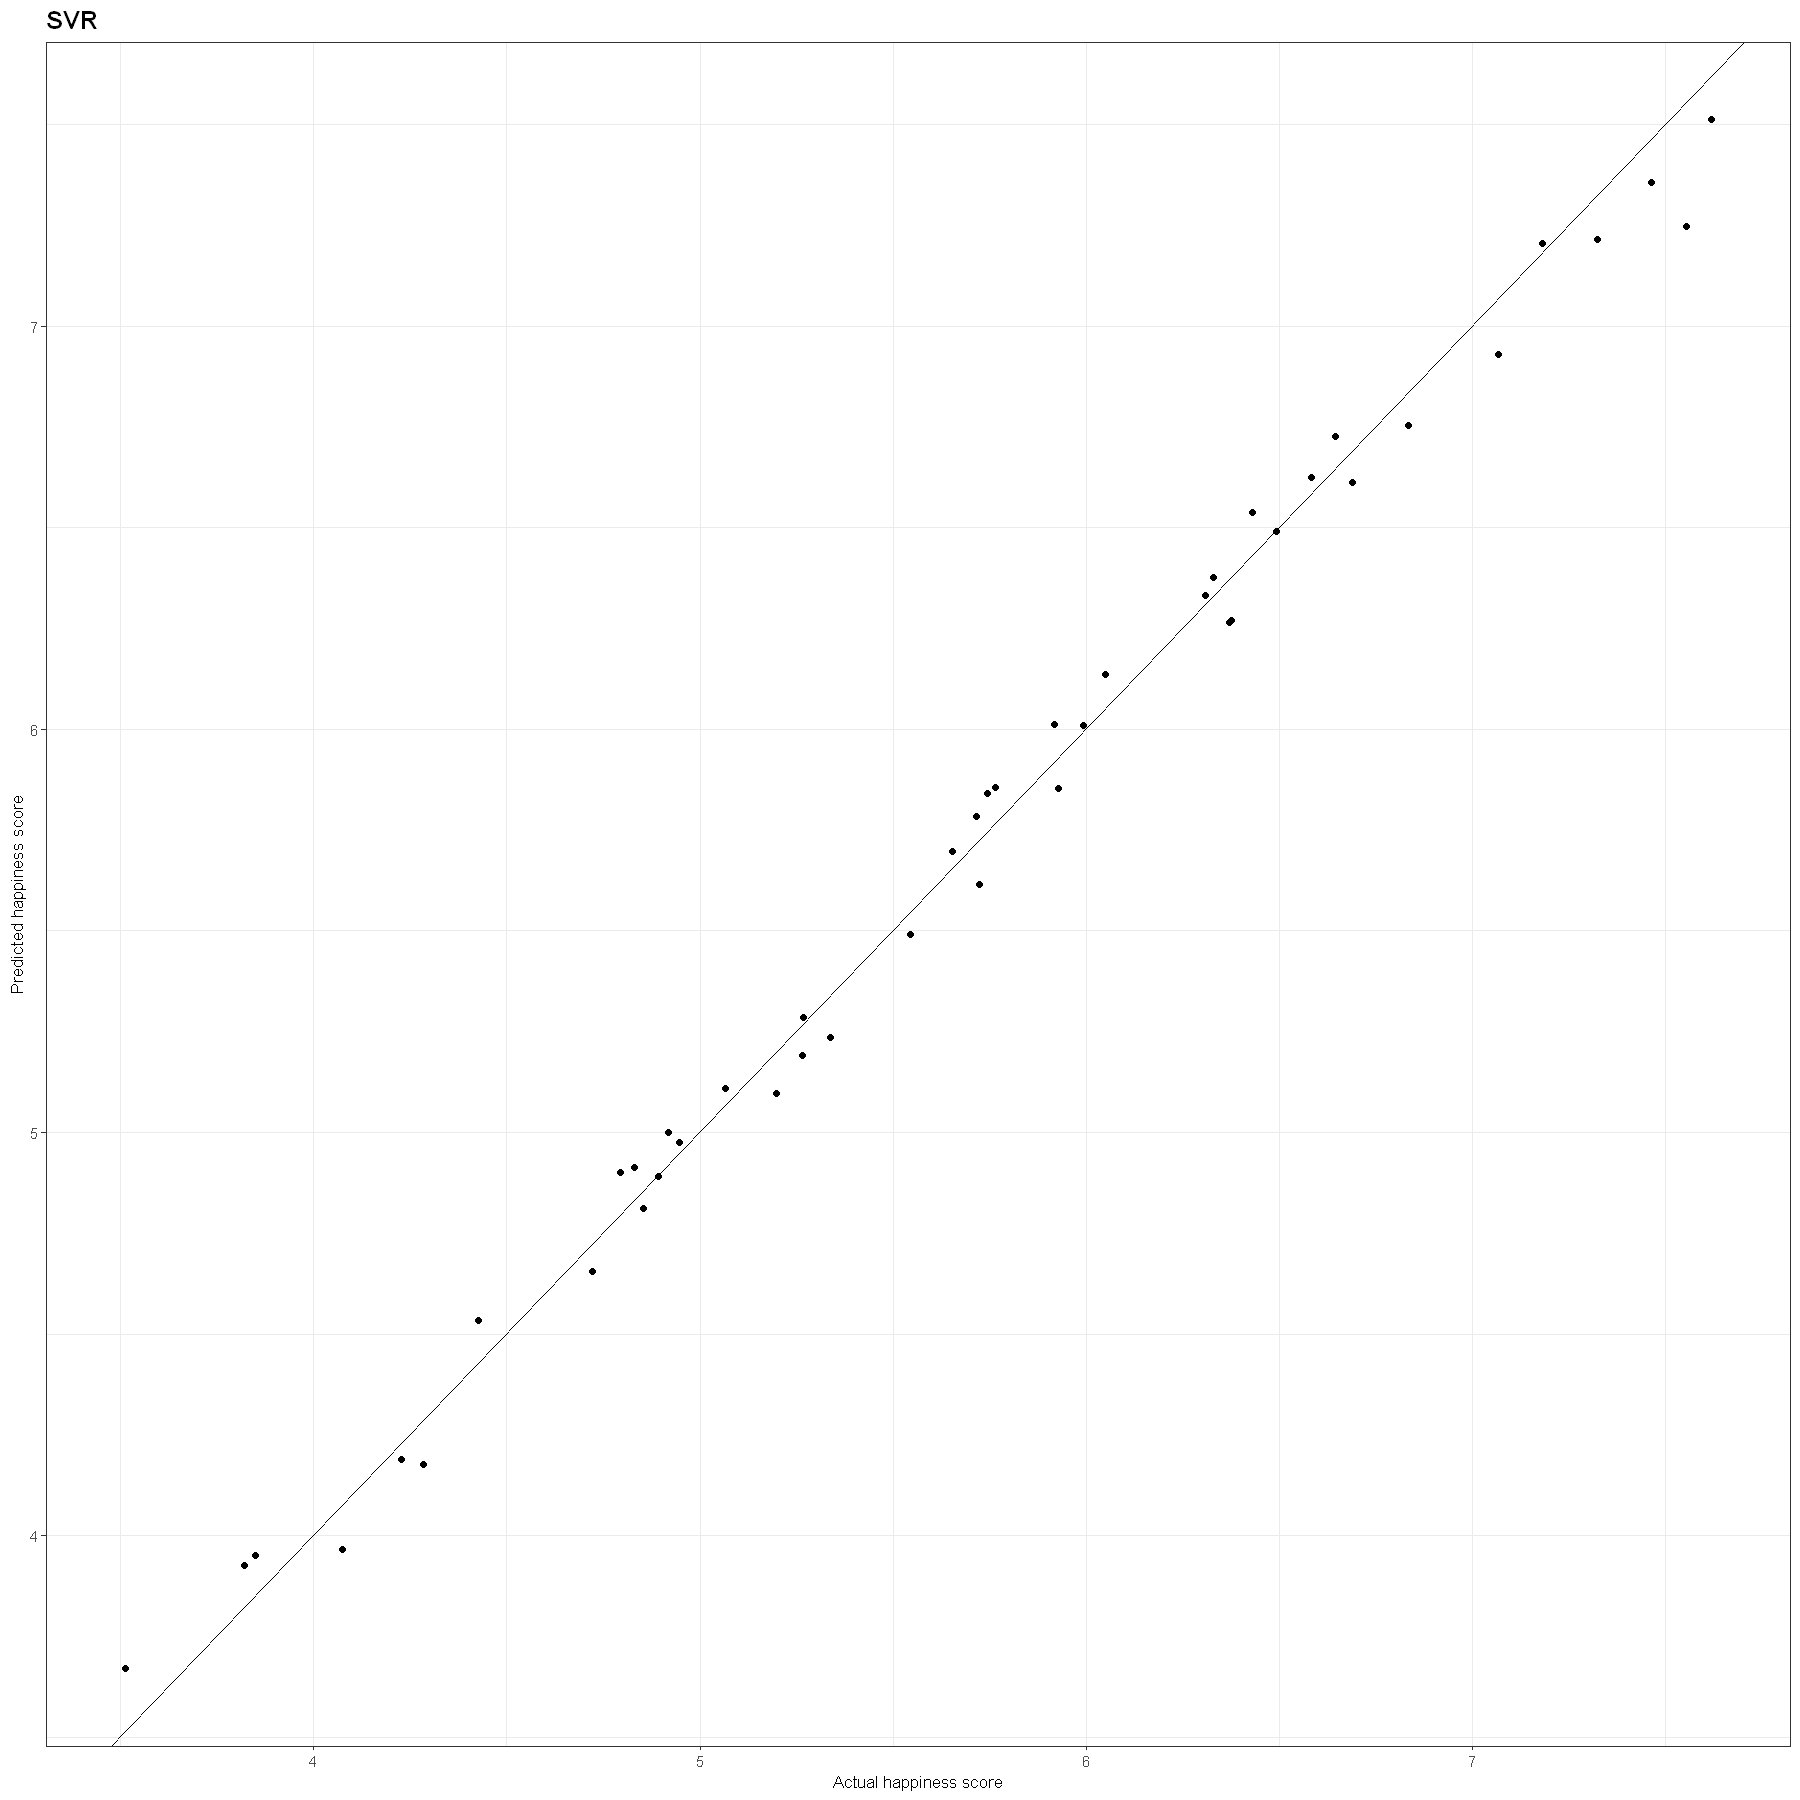

In [36]:
y_pred_svr = predict(regressor_svr,  newdata = test_set)

Pred_Actual_svr <- as.data.frame(cbind(Prediction = y_pred_svr, Actual = test_set$Score))


Pred_Actual_lm.versus.svr <- cbind(Prediction.lm = y_pred_lm, Prediction.svr = y_pred_svr, Actual = test_set$Score)

gg.svr <- ggplot(Pred_Actual_svr, aes(Actual, Prediction)) +
  geom_point() + theme_bw() + geom_abline() +
  labs(title = "SVR", x = "Actual happiness score",
       y = "Predicted happiness score") +
  theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)), 
        axis.title = element_text(family = "Helvetica", size = (10)))
gg.svr
ggsave("svrmodel.png")

In [38]:
library(rpart)
regressor_dt = rpart(formula = Score ~ .,
                  data = dataset,
                  control = rpart.control(minsplit = 10))
summary(regressor_dt)

Call:
rpart(formula = Score ~ ., data = dataset, control = rpart.control(minsplit = 10))
  n= 149 

          CP nsplit rel error    xerror       xstd
1 0.50721060      0 1.0000000 1.0101114 0.10544011
2 0.14571618      1 0.4927894 0.6157971 0.05505040
3 0.07771100      2 0.3470732 0.4384032 0.04151696
4 0.05496191      3 0.2693622 0.3876167 0.04027925
5 0.04847301      4 0.2144003 0.3622854 0.03929269
6 0.02546646      5 0.1659273 0.2878238 0.03649581
7 0.01444021      6 0.1404608 0.2626825 0.03105171
8 0.01424894      7 0.1260206 0.2549639 0.02929547
9 0.01000000      8 0.1117717 0.2538658 0.02818508

Variable importance
              GDP            Health            Family           Freedom 
               27                22                19                10 
       Corruption Dystopia.residual        Generosity 
                9                 8                 4 

Node number 1: 149 observations,    complexity param=0.5072106
  mean=5.532839, MSE=1.145571 
  left son=2 (91 o

In [39]:
install.packages("rpart.plot")
library(rpart.plot)

Warning message:
"package 'rpart.plot' is in use and will not be installed"


Saving 6.67 x 6.67 in image

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graph

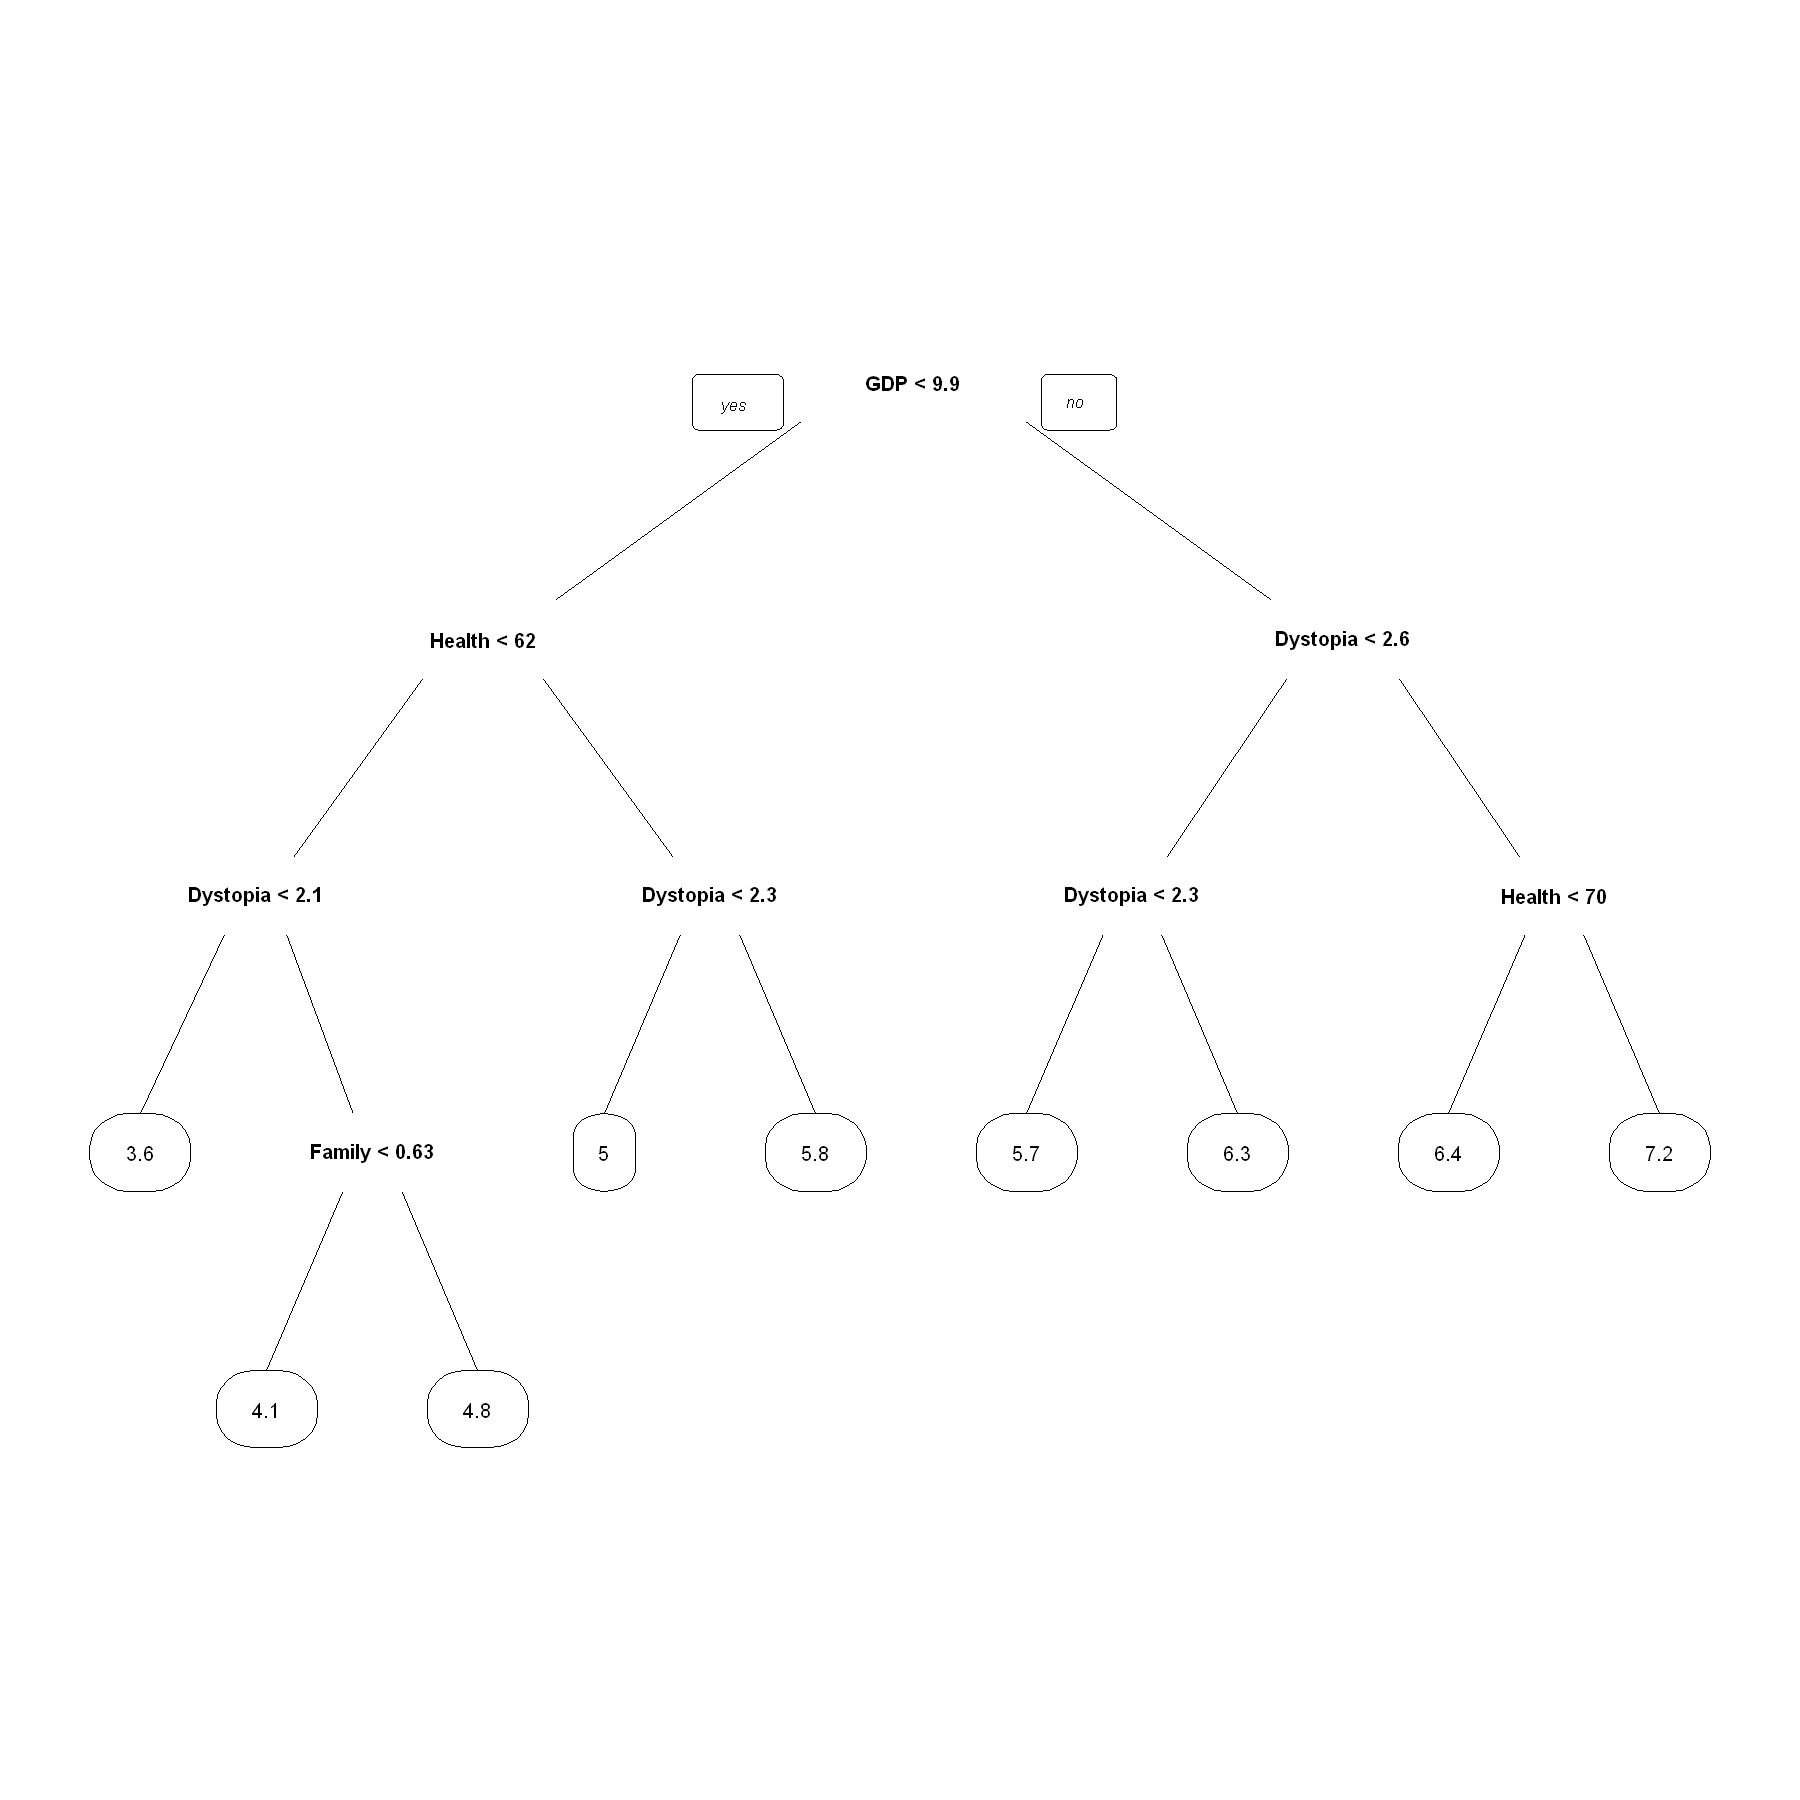

In [45]:
library(rpart.plot)
prp(regressor_dt)
ggsave("dtree.png")

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, 

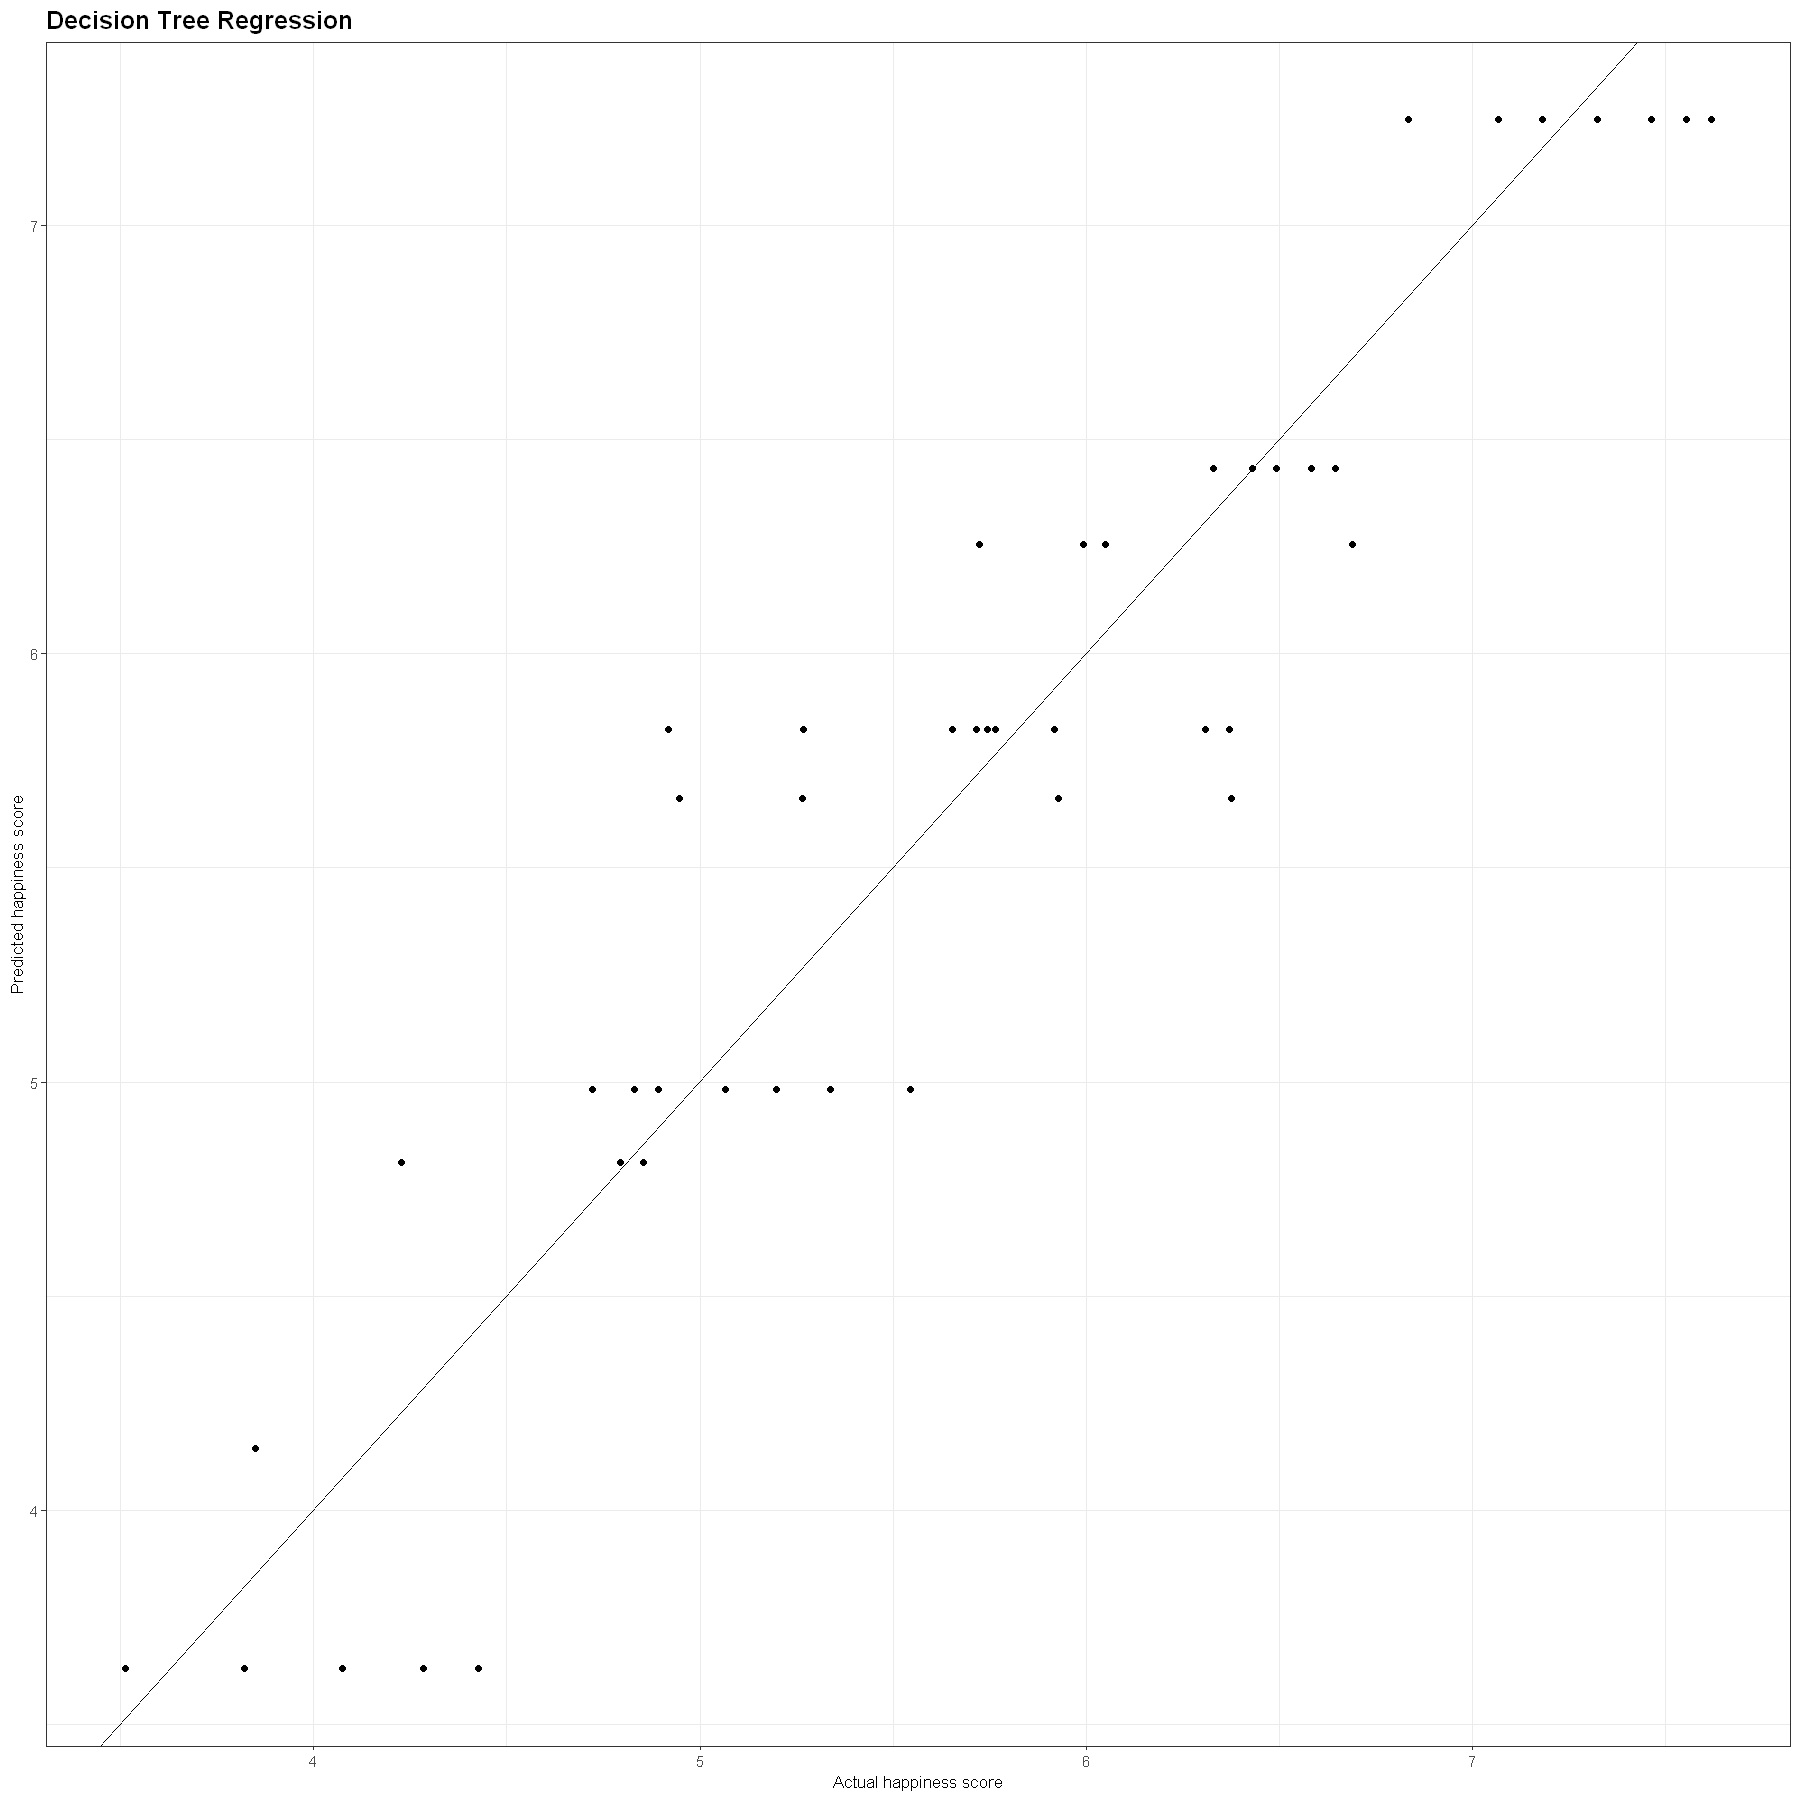

In [44]:
y_pred_dt = predict(regressor_dt, newdata = test_set)

Pred_Actual_dt <- as.data.frame(cbind(Prediction = y_pred_dt, Actual = test_set$Score))


gg.dt <- ggplot(Pred_Actual_dt, aes(Actual, Prediction )) +
  geom_point() + theme_bw() + geom_abline() +
  labs(title = "Decision Tree Regression", x = "Actual happiness score",
       y = "Predicted happiness score") +
  theme(plot.title = element_text(family = "Helvetica", face = "bold", size = (15)), 
        axis.title = element_text(family = "Helvetica", size = (10)))
gg.dt
ggsave("dtmodel.png")

In [29]:
head(happ)

,Country,Continent,Score,GDP,Family,Health,Freedom,Generosity,Corruption,Dystopia.residual,Rank
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Finland,Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,3.253,1
2,Denmark,Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.868,2
3,Switzerland,Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.839,3
4,Iceland,Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2.967,4
5,Netherlands,Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2.798,5
6,Norway,Europe,7.392,11.053,0.954,73.3,0.960,0.093,0.270,2.580,6


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, 

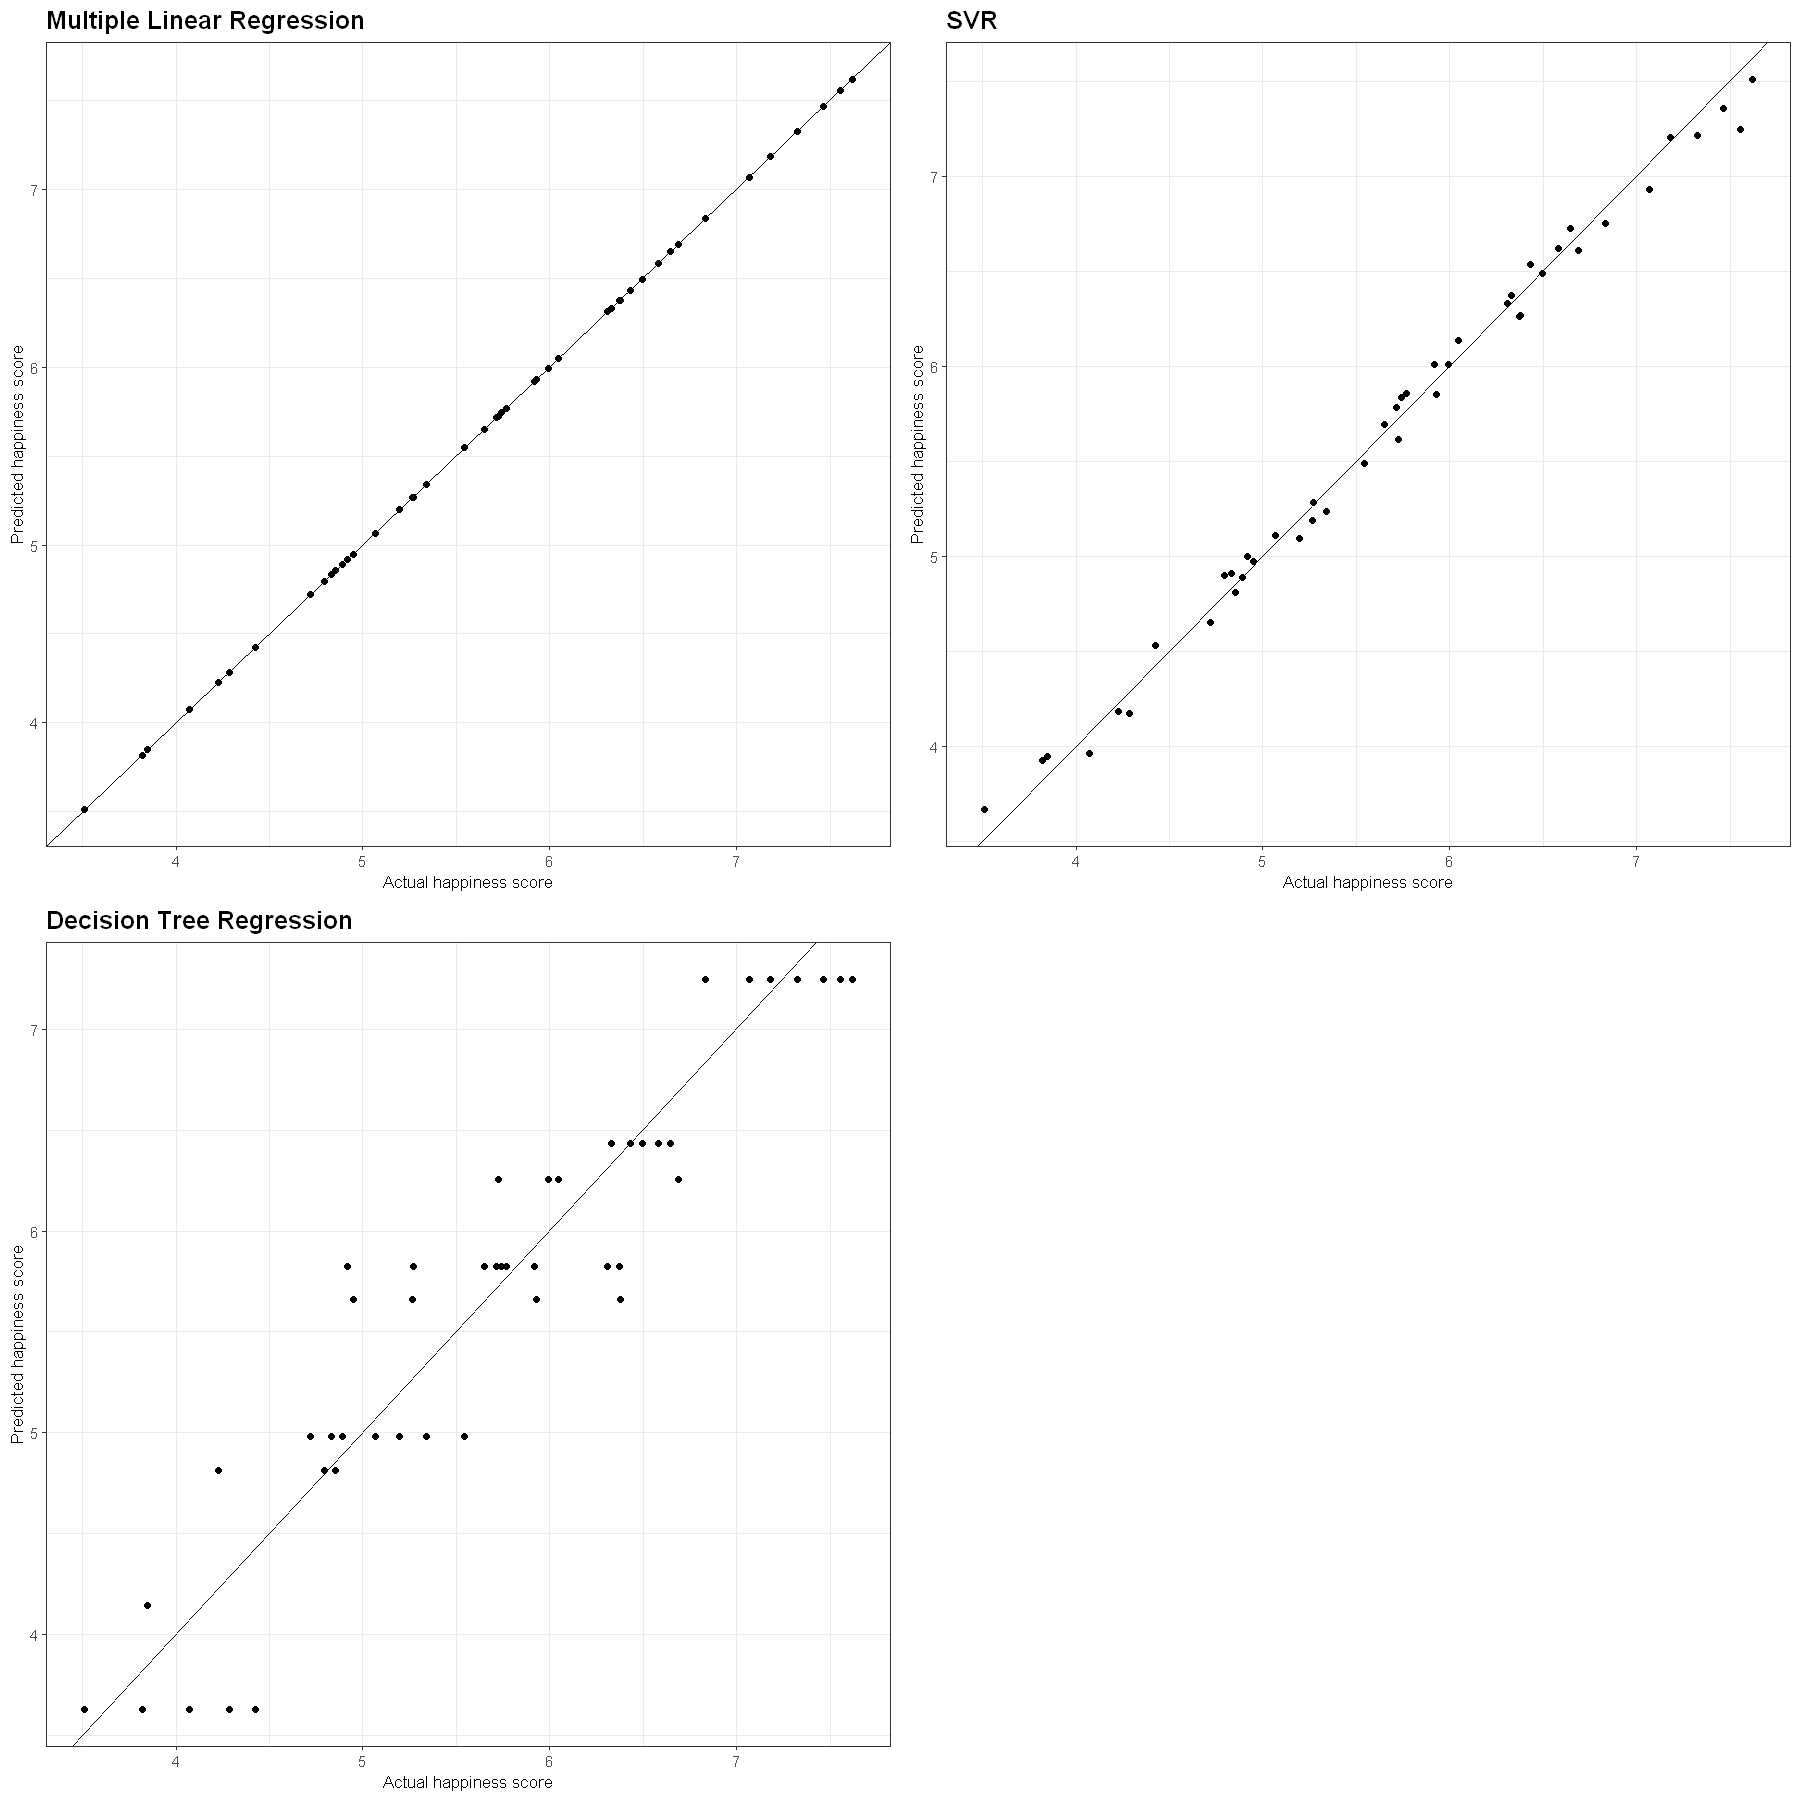

In [53]:
library(ggpubr)
ggarrange(gg.lm, gg.svr, gg.dt, ncol = 2, nrow = 2)
ggsave("compare.png")

In [50]:
install.packages("ggarrange")
library("ggarrange")

Installing package into 'C:/Users/tulik/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

Warning message:
"package 'ggarrange' is not available (for R version 4.0.0)"


ERROR: Error in library("ggarrange"): there is no package called 'ggarrange'
